## Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la url: https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:
- "coche": Nombres de los coches.
- "precio_rebajado": Precios rebajados.
- "precio_original": Precios originales.
- "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. 

In [7]:
# antes de empezar importamos las librerías que vamos a usar. 
# Importar librerías para web scraping y manipulación de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [8]:
url_coches = 'https://www.ocasionplus.com/ofertas-especiales'

res_coches = requests.get (url_coches)

if res_coches.status_code == 200:

    print("La respuesta de la petición es:", res_coches.status_code)

else:
    print ('none')

La respuesta de la petición es: 200


b'<!DOCTYPE html><html><head><meta charSet="UTF-8" class="next-head"/><title class="next-head">Coches de segunda mano con ofertas especiales - N\xc2\xba1 calidad-precio | OcasionPlus</title><meta name="description" content="Coches de segunda mano con ofertas especiales \xe2\x9c\x93 Financiaci\xc3\xb3n 100% en el acto \xe2\x9c\x93 15 d\xc3\xadas/1000 km de prueba \xe2\x9c\x93 Coches de ocasi\xc3\xb3n con grandes descuentos " class="next-head"/><meta name="robots" content="all" class="next-head"/><meta name="viewport" content="width=device-width, initial-scale=1.0" class="next-head"/><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon" class="next-head"/><link rel="apple-touch-icon" sizes="180x180" href="/static/favicon/apple-touch-icon.png" class="next-head"/><link rel="icon" type="image/png" sizes="32x32" href="/static/favicon/favicon-32x32.png" class="next-head"/><link rel="icon" type="image/png" sizes="194x194" href="/static/favicon/favicon-194x194.png" cl
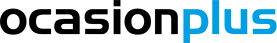

In [9]:
res_coches.content

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano con ofertas especiales - Nº1 calidad-precio | OcasionPlus</title><meta class="next-head" content="Coches de segunda mano con ofertas especiales ✓ Financiación 100% en el acto ✓ 15 días/1000 km de prueba ✓ Coches de ocasión con grandes descuentos " name="description"/><meta class="next-head" content="all" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon
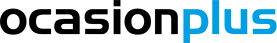

In [10]:
sopa_coches = BeautifulSoup (res_coches.content, 'html.parser')
sopa_coches

In [11]:
#primero sacamos los nombres de los coches
lista_nombre_coches = sopa_coches.find_all ('h2', {'style':'overflow-x:hidden'})
lista_nombre_coches[:4]

[<h2 style="overflow-x:hidden">Fiat Tipo Sedan 1.4 16v Easy (95 CV)</h2>,
 <h2 style="overflow-x:hidden">Citroen C3 PureTech 82 Shine (83 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 308 SW 1.2 PureTech S&amp;S Active (130 CV)</h2>,
 <h2 style="overflow-x:hidden">Citroen C4 PureTech 130 S&amp;S Feel Edition (130 CV)</h2>]

In [12]:
lista_nombre_coches [0].text 

'Fiat Tipo Sedan 1.4 16v Easy (95 CV)'

In [13]:
#ahora sacamos el precio sin rebajar, porque no todos tienen precio rebajado
lista_precio_coches = sopa_coches.find_all ('span',{'class':'jsx-2689423372 price'})
lista_precio_coches [:4]

[<span class="jsx-2689423372 price">9.000<!-- -->€</span>,
 <span class="jsx-2689423372 price">11.545<!-- -->€</span>,
 <span class="jsx-2689423372 price">12.636<!-- -->€</span>,
 <span class="jsx-2689423372 price">9.450<!-- -->€</span>]

In [14]:
lista_precio_coches [0].text

'9.000€'

In [15]:
#ahora sacamos el precio rebajado
lista_precio_tachado = sopa_coches.find_all ('span',{'class':'jsx-2870186023 priceLast'})
lista_precio_tachado [:15]

[<span class="jsx-2870186023 priceLast">10.350<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">15.600<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">15.870<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">10.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">27.800<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">19.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">10.900<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">21.490<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">12.200<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">17.750<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">19.500<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">14.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">15.700<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">13.650<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">16.700<!-- -->€</span>]

In [16]:
lista_precio_tachado [0].text

'10.350€'

In [17]:
#ahora sacamos los km recorridos
lista_km = sopa_coches.find_all ('span',{'class':'jsx-3960002075 detail big'})


In [67]:
lista_km

[<span class="jsx-3960002075 detail big"><img alt="Fecha Matriculación" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/LsD-JDSSgkhBX7eJ28Z8z_jGoxe8QTmkU6st1MtZpyA/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1jYWxlbmRhcmlvLnBuZw" width="25px"/>04/2018</span>,
 <span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>94.085<!-- --> km</span>,
 <span class="jsx-3960002075 detail big"><img alt="Combustible" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/ZxWvafD3gA4OZaCrp7xDqYAFAzTGylYu5kFeuVUsvIw/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvb

In [75]:
kms = []

for km in lista_km:
    
    kms.append (km.text)

In [76]:
kms

['04/2018',
 '94.085 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '05/2021',
 '51.694 km',
 'Gasolina',
 'Manual',
 '03/2018',
 '62.682 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '09/2015',
 '123.264 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '06/2023',
 '24.996 km',
 'Diésel',
 'Manual',
 'Único propietario',
 'Garantía oficial: Julio 2025',
 '12/2022',
 '54.057 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 'Garantía oficial: Enero 2025',
 '03/2017',
 '73.411 km',
 'Gasolina',
 'Manual',
 '07/2023',
 '11.723 km',
 'Gasolina',
 'Manual',
 'Único propietario',
 '05/2017',
 '42.321 km',
 'Eléctrico',
 'Automático',
 'Libro Mantenimiento',
 '01/2016',
 '116.684 km',
 'Diésel',
 'Automático',
 '04/2012',
 '129.655 km',
 'Gasolina',
 'Automático',
 '12/2020',
 '52.382 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 'Garantía oficial: Enero 2025',
 '07/2016',
 '146.731 km',
 'Diésel',
 'Manual',
 '09/202

In [78]:
patron_km = re.compile(r'(\d+\.\d+|\d+)\s*km') #Generamos el patron que queremos extraer

km_extraidos = []

for km in kms:
    match_km = patron_km.search(km) #buscamos el patron.
    if match_km:
        km_extraidos.append(match_km.group()) #Utilizamos group() para extraer la coincidencia del match_km y lo apendeamos en km extraidos
     

In [79]:
km_extraidos

['94.085 km',
 '51.694 km',
 '62.682 km',
 '123.264 km',
 '24.996 km',
 '54.057 km',
 '73.411 km',
 '11.723 km',
 '42.321 km',
 '116.684 km',
 '129.655 km',
 '52.382 km',
 '146.731 km',
 '32.709 km',
 '82.888 km',
 '91.525 km',
 '77.831 km',
 '72.170 km',
 '117.610 km',
 '78.792 km']

In [80]:
len(km_extraidos)

20

In [23]:

#ahora tenemos una lista con todos los nombres de coches. Aquí sólo se muestran 4

nombres = []

for nombre in lista_nombre_coches:
    nombres.append (nombre.text)

nombres [:4]


['Fiat Tipo Sedan 1.4 16v Easy (95 CV)',
 'Citroen C3 PureTech 82 Shine (83 CV)',
 'Peugeot 308 SW 1.2 PureTech S&S Active (130 CV)',
 'Citroen C4 PureTech 130 S&S Feel Edition (130 CV)']

In [24]:
#ahora tenemos una lista con todos los precios. Estos serían los precios que tienen los coches actualmente.  Aquí sólo se muestran 4

precios_rebajados = []

for precio in lista_precio_coches:
    precios_rebajados.append (precio.text)

precios_rebajados [:4]

['9.000€', '11.545€', '12.636€', '9.450€']

In [25]:
len (precios_rebajados)

20

In [26]:
precios_originales = []

for precio_t in lista_precio_tachado:
        precios_originales.append (precio_t.text)

precios_originales [:4]

['10.350€', '15.600€', '15.870€', '10.990€']

In [27]:
len (precios_originales)

20

In [82]:
info_pagina_coches = {'nombre':[],'precios_rebajados':[],'precios_originales':[],'Km':[]}

In [83]:
info_pagina_coches['nombre'] = nombres
info_pagina_coches['precios_rebajados'] = precios_rebajados
info_pagina_coches['precios_originales'] = precios_originales
info_pagina_coches['Km'] = km_extraidos

In [84]:
info_pagina_coches

{'nombre': ['Fiat Tipo Sedan 1.4 16v Easy (95 CV)',
  'Citroen C3 PureTech 82 Shine (83 CV)',
  'Peugeot 308 SW 1.2 PureTech S&S Active (130 CV)',
  'Citroen C4 PureTech 130 S&S Feel Edition (130 CV)',
  'Toyota Proace 1.5D GX Plus 1PL 2PT L1 (100CV)',
  'Dacia Jogger S.L. Extreme TCe (110CV) 7 plazas',
  'Opel Meriva 1.4 Selective (120CV)',
  'Hyundai Kona 1.0 TGDI Klass 4x2 (120 CV)',
  'Renault Kangoo Furgon Z.E. (60 CV) AUTO',
  'Citroen Grand C4 Picasso BlueHDI 150 Airdream Feel Edition Aut. 7 Plazas (150 CV)',
  'BMW Serie 3 320i AUTO (184 CV)',
  'Skoda Fabia 1.0 TSI  (110cv) Ambition Plus',
  'Audi A3 Sportback Sportback Attracted 1.6 TDI clean diesel 81 kW (110 CV)',
  'Opel Corsa 1.5D DT Edition (102 CV)',
  'Audi A1 Sportback Sportback Attraction 1.6 TDI (116 CV)',
  'Mercedes-Benz Clase C C Coupe 43 Mercedes 4Matic (367 CV) AMG AUTO',
  'Peugeot Traveller BlueHDi 120 S&S Business Long (120 CV) 9 Plazas',
  'Peugeot Traveller BlueHDi 120 S&S Business Long (120 CV) 9 Plazas',

In [85]:
df = pd.DataFrame(info_pagina_coches)

In [86]:
df

,nombre,precios_rebajados,precios_originales,Km
0,Fiat Tipo Sedan 1.4 16v Easy (95 CV),9.000€,10.350€,94.085 km
1,Citroen C3 PureTech 82 Shine (83 CV),11.545€,15.600€,51.694 km
2,Peugeot 308 SW 1.2 PureTech S&S Active (130 CV),12.636€,15.870€,62.682 km
3,Citroen C4 PureTech 130 S&S Feel Edition (130 CV),9.450€,10.990€,123.264 km
4,Toyota Proace 1.5D GX Plus 1PL 2PT L1 (100CV),24.363€,27.800€,24.996 km
5,Dacia Jogger S.L. Extreme TCe (110CV) 7 plazas,18.090€,19.990€,54.057 km
6,Opel Meriva 1.4 Selective (120CV),9.000€,10.900€,73.411 km
7,Hyundai Kona 1.0 TGDI Klass 4x2 (120 CV),18.627€,21.490€,11.723 km
8,Renault Kangoo Furgon Z.E. (60 CV) AUTO,10.727€,12.200€,42.321 km
9,Citroen Grand C4 Picasso BlueHDI 150 Airdream ...,13.545€,17.750€,116.684 km
